Name: plot_cin.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 01 July 2023

Purpose: Plot CIN comparisons of SRW output

In [17]:
from plotting_functions import read_grib
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cpf
import seaborn
import pygrib

In [18]:
# hour of interest
hr = 6
# directory where hrrr grib data are located
dgrib_h = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_hrrrphys/2019052000/postprd/"
# read in hrrr CIN
cin_h, lat, lon, valid_date = read_grib(hr, dgrib_h, "natlev", 1409, array_only=False)

# directory where rap grib data are located
dgrib_r = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_rapphys/2019052000/postprd/"
# read in rap CIN
cin_r = read_grib(hr, dgrib_r, "natlev", 1409, array_only=True)

Reading in grib output
Reading in grib output


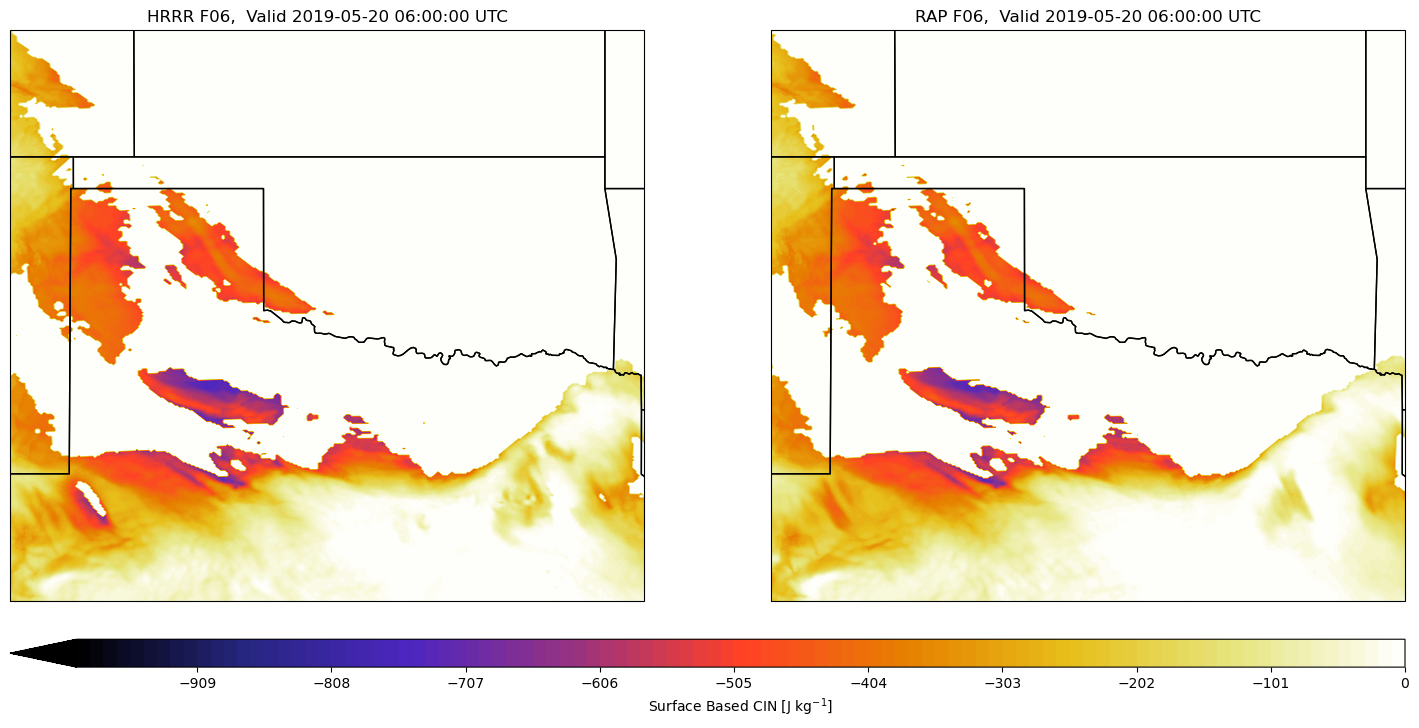

In [22]:
# Define your custom colorbar bounds
cbar_min = -1000
cbar_max = 0
clevs = np.linspace(cbar_min, cbar_max, 100)

# color palette
colors = "CMRmap"

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18,10))
# mapping
plt_area = [-104, -94, 30, 39] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)

# plot
c0 = ax[0].contourf(lon, lat, cin_h.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, extend="min")
c1 = ax[1].contourf(lon, lat, cin_r.values, clevs,
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, extend="min")

# pretty up
ax[0].set_title(f"HRRR F0{hr},  Valid {valid_date} UTC")
ax[1].set_title(f"RAP F0{hr},  Valid {valid_date} UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.05, aspect=50)
cbar.set_label('Surface Based CIN [J kg$^{-1}$]')